Shidqi Ahmad Musyaffa'

In [2]:
#import library
!pip install ucimlrepo
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import tensorflow as tf
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from imblearn.over_sampling import SMOTE
from ucimlrepo import fetch_ucirepo


In [3]:
# Fetch dataset
ai4i_2020_predictive_maintenance_dataset = fetch_ucirepo(id=601)
X = ai4i_2020_predictive_maintenance_dataset.data.features
y = ai4i_2020_predictive_maintenance_dataset.data.targets['TWF']

In [4]:
# One-hot encode 'Type' column
encoder = OneHotEncoder(sparse=False)
one_hot_encoded = encoder.fit_transform(X[['Type']])
one_hot_encoded_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(['Type']))
df_train = pd.concat([X, one_hot_encoded_df], axis=1).drop("Type", axis=1)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [5]:
# Resample using SMOTE
sm = SMOTE(random_state=13)
X_res, y_res = sm.fit_resample(df_train, y)

In [6]:
# Split data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=2550)


In [7]:
# Build neural network model
def build_model():
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Dense(7, activation="relu"))
    model.add(tf.keras.layers.Dense(7, activation="relu"))
    model.add(tf.keras.layers.Dense(1, activation="sigmoid"))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model


In [8]:
# Train the model
model = build_model()
NUM_EPOCHS = 12
BATCH_SIZE = 32
model.fit(x_train, y_train, batch_size=BATCH_SIZE, epochs=NUM_EPOCHS, verbose=2)

Epoch 1/12
498/498 - 2s - loss: 24.8148 - accuracy: 0.7582 - 2s/epoch - 5ms/step
Epoch 2/12
498/498 - 1s - loss: 0.2873 - accuracy: 0.8747 - 1s/epoch - 3ms/step
Epoch 3/12
498/498 - 2s - loss: 0.2523 - accuracy: 0.8977 - 2s/epoch - 5ms/step
Epoch 4/12
498/498 - 3s - loss: 0.2370 - accuracy: 0.9055 - 3s/epoch - 5ms/step
Epoch 5/12
498/498 - 2s - loss: 0.2230 - accuracy: 0.9108 - 2s/epoch - 3ms/step
Epoch 6/12
498/498 - 2s - loss: 0.2163 - accuracy: 0.9179 - 2s/epoch - 4ms/step
Epoch 7/12
498/498 - 1s - loss: 0.2172 - accuracy: 0.9158 - 1s/epoch - 3ms/step
Epoch 8/12
498/498 - 1s - loss: 0.1974 - accuracy: 0.9263 - 1s/epoch - 3ms/step
Epoch 9/12
498/498 - 2s - loss: 0.1946 - accuracy: 0.9316 - 2s/epoch - 4ms/step
Epoch 10/12
498/498 - 3s - loss: 0.2041 - accuracy: 0.9263 - 3s/epoch - 5ms/step
Epoch 11/12
498/498 - 3s - loss: 0.1911 - accuracy: 0.9297 - 3s/epoch - 7ms/step
Epoch 12/12
498/498 - 2s - loss: 0.1912 - accuracy: 0.9314 - 2s/epoch - 4ms/step


In [9]:
# Evaluate model accuracy
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print("Model Accuracy:", test_accuracy)

125/125 [==============================] - 1s 4ms/step - loss: 0.1803 - accuracy: 0.9357
Model Accuracy: 0.9357106685638428


In [10]:
# Example data for prediction
data_example = {
    'Air temperature': [299.1],
    'Process temperature': [308.8],
    'Rotational speed': [1500],
    'Torque': [40.0],
    'Tool wear': [10],
    'Type_H': [0.0],
    'Type_L': [1.0],
    'Type_M': [0.0]
}
df_example = pd.DataFrame(data_example)

In [11]:
# Make predictions
y_pred = model.predict(x_test)
y_pred = (y_pred > 0.5)

125/125 [==============================] - 1s 3ms/step


              precision    recall  f1-score   support

           0       0.97      0.90      0.93      2037
           1       0.90      0.97      0.94      1945

    accuracy                           0.94      3982
   macro avg       0.94      0.94      0.94      3982
weighted avg       0.94      0.94      0.94      3982


Confusion Matrix: [[1836  201]
 [  55 1890]]
Accuracy Score: 0.9357106981416373


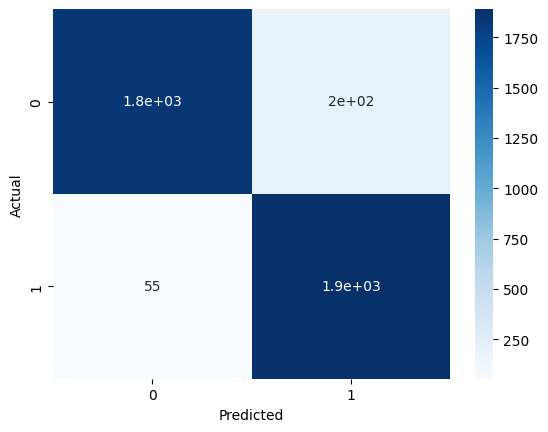

In [12]:
# Print classification report and confusion matrix
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm, columns=['0', '1'], index=['0', '1'])
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
sns.heatmap(df_cm, cmap='Blues', annot=True)
print("\nConfusion Matrix:", cm)
print("Accuracy Score:", accuracy_score(y_test, y_pred))